In [20]:
import pandas as pd
import matplotlib.pyplot as plt

import cvar

In [2]:
df = pd.read_csv(cvar.pypi_versions_dataset_path, low_memory=False)
df.drop(["Unnamed: 0", "idx"], axis=1, inplace=True)

In [3]:
df.shape

(7693395, 12)

In [4]:
df.head()

,pkg_idx,name,version,license,description,homepage,repository,author,maintainer,author_email,maintainer_email,requires_dist
0,0,0,0.0.0,MIT,0,NaN,[],hallazzang,NaN,hallazzang@gmail.com,NaN,[]
1,1,0-core-client,1.1.0a3,Apache 2.0,Zero-OS 0-core client,https://github.com/zero-os/0-core,[],Muhamad Azmy,NaN,muhamada@greenitglobe.com,NaN,"['redis (>=2.10.5)', 'redis (>=2.10.5)']"
2,1,0-core-client,1.1.0a4,Apache 2.0,Zero-OS 0-core client,https://github.com/zero-os/0-core,[],Muhamad Azmy,NaN,muhamada@greenitglobe.com,NaN,[]
3,1,0-core-client,1.1.0a5,Apache 2.0,Zero-OS 0-core client,https://github.com/zero-os/0-core,[],Muhamad Azmy,NaN,muhamada@greenitglobe.com,NaN,"['redis (>=2.10.5)', 'redis (>=2.10.5)']"
4,1,0-core-client,1.1.0a7,Apache 2.0,Zero-OS 0-core client,https://github.com/zero-os/0-core,[],Muhamad Azmy,NaN,muhamada@greenitglobe.com,NaN,"['redis (>=2.10.5)', 'redis (>=2.10.5)']"


In [5]:
# Percent null
df["license"].isna().sum() / len(df)

np.float64(0.31331356312785186)

In [10]:
# Percent unique
df["license"].unique().shape[0] / len(df)

0.0037306026793112795

In [13]:
licenses = df["license"].dropna()

In [14]:
# Top 10 most common license fields
licenses.value_counts().head(10)

license
MIT                            1604533
Apache License 2.0              528761
Apache-2.0                      412034
MIT License                     308942
Apache 2.0                      182937
BSD                             176353
AGPL-3                          144698
UNKNOWN                         111294
GPLv3                            74858
Apache Software License 2.0      70752
Name: count, dtype: int64

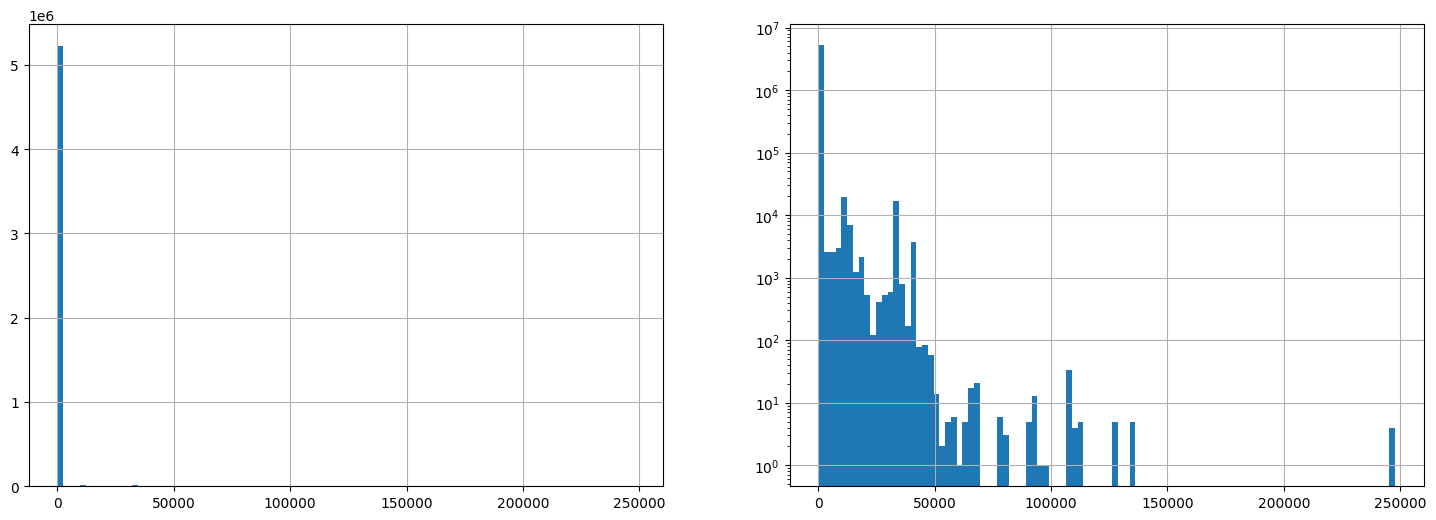

In [26]:
# length distribution
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

license_lengths = licenses.str.len()
license_lengths.hist(bins=100, ax=ax[0])
# new plot with log scale
license_lengths.hist(bins=100, log=True, ax=ax[1])
